In [44]:
import pandas as pd
df = pd.read_csv('04_combine_all.tsv', sep='\t')

In [45]:
df.groupby('dept').size()

dept
STT_AB     75353
STT_CS     44021
STT_MV    245303
STT_NS     70769
STT_TT    369028
dtype: int64

In [46]:
df['char_len'] = df['uni'].str.len()

In [47]:
df['char_len'].describe()

count    804474.000000
mean         66.152022
std          49.493217
min           1.000000
25%          28.000000
50%          53.000000
75%          93.000000
max         516.000000
Name: char_len, dtype: float64

<Axes: >

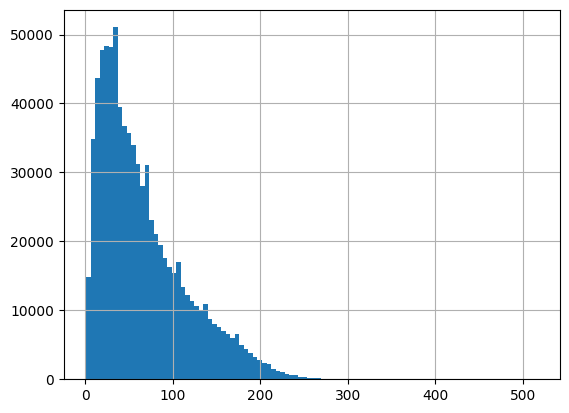

In [48]:
df['char_len'].hist(bins=100)

<Axes: >

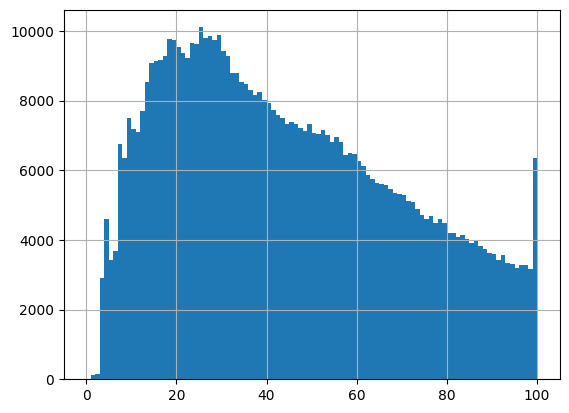

In [49]:
df['char_len'].hist(bins=100, range=(0, 100))

In [50]:
df = df[(df['char_len'] < 80) & (df['char_len'] > 15)]

In [51]:
df.groupby('dept').size()

dept
STT_AB     44373
STT_CS     18277
STT_MV    127287
STT_NS     16800
STT_TT    261560
dtype: int64

In [52]:
depts = df['dept'].unique()

In [65]:
benchmarks = []
for dept in depts:
    print(dept)
    df_dept = df[df['dept'] == dept]
    df_dept = df_dept.sort_values('grade', ascending=False)
    df_dept = df_dept[0:1000]
    benchmarks.append(df_dept)

STT_AB
STT_NS
STT_TT
STT_CS
STT_MV


In [68]:
benchmarks = pd.concat(benchmarks)

In [69]:
benchmarks.head()

,file_name,uni,wylie,url,dept,grade,char_len
515126,STT_AB00208_0075_398080_to_399889,བ་ཕྱུགས་སྟོང་ཕྲག་དེའི་འོ་མ་བཞོས་ནས་,ba phyugs stong phrag de'i 'o ma bzhos nas,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,36
140345,STT_AB00225_0051_634428_to_636220,དེ་སྔ་ཡིན་ན་པད་ཁའི་མེ་ཏོག་གིས་,de snga yin na pad kha'i me tog gis,https://huggingface.co/datasets/openpecha/STT_...,STT_AB,3,31
166731,STT_AB00277_0455_2502107_to_2503882,གཟུགས་སྐུ་སྤྱི་ཙམ་ལ་སྤྲུལ་སྐུ་དང་།,gzugs sku spyi tsam la sprul sku dang /,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,35
548584,STT_AB00211_0052_282124_to_285981,སྐྱེ་བ་འདི་གཅིག་པུ་ཙམ་མ་ཡིན་པར། སྔོན་གྱི་སྐྱེ་...,skye ba 'di gcig pu tsam ma yin par/_sngon gyi...,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,59
254533,STT_AB00166_0076_222690_to_224429,གཡུལ་འགྱེད་ཚེ་ན་གནོད་པ་མང་།།,g.yul 'gyed tshe na gnod pa mang /[ ]/,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_AB,3,29


In [72]:
benchmarks.groupby('dept').size()

dept
STT_AB    1000
STT_CS    1000
STT_MV    1000
STT_NS    1000
STT_TT    1000
dtype: int64

In [81]:
sample = 3
for dept in depts:
    print(dept)
    df_dept = benchmarks[benchmarks['dept'] == dept]
    df_dept = df_dept.sample(frac=1)
    for i in range(0, sample):
        print(df_dept.iloc[i]['uni'], df_dept.iloc[i]['url'])

STT_AB
སྦྱིན་པ་འདུ་བ་ནི་སླ་ལ།  https://d38pmlk0v88drf.cloudfront.net/wav/STT_AB00173_0053_187226_to_188967.wav
མཁས་པའི་བཞད་གད་ཀྱི་གནས་ཡིན་ནོ།།  https://d38pmlk0v88drf.cloudfront.net/wav/STT_AB00172_2487_9026424_to_9028472.wav
མྱུར་པོར་མི་སྟེར་བར་  https://d38pmlk0v88drf.cloudfront.net/wav/STT_AB00173_0621_2685435_to_2686885.wav
STT_NS
ད་རྒྱ་མི་ཀི་ནང་ལ་མི་དེ་ཚོ་ཀི་འདི་ག་རེ་ལབ་ཀི་འདུག་ལབ་ན་མི་ཁ་ཤས་ཀིས་  https://d38pmlk0v88drf.cloudfront.net/wav/STT_NS0117_0011_69634_to_72874.wav
དེ་ལས་ཀ་ཡོད་ ཁོས་མ་རབས་ཚ་མྱོང་ཁག་པོ་སྐད་ཆ་བཤད་བསྡད་ཀི་འདུག་ ང་ནི་  https://d38pmlk0v88drf.cloudfront.net/wav/STT_NS0081_0149_1064415_to_1067115.wav
ད་ང་ཡིན་ནས། ང་རང་ང་རང་ཞེད་ཡིས་འདུག་རེད་བ་ཡ། གལ་སྲིད།  https://d38pmlk0v88drf.cloudfront.net/wav/STT_NS0172_0136_993507_to_996527.wav
STT_TT
ཀུན་ཏུ་འགྲོ་དང་ཁས་ལེན་རྟོགས་དང་ཟིལ་གནོན་པར།  https://d38pmlk0v88drf.cloudfront.net/wav/STT_TT00035_00210.600-00212.950.wav
ཆོས་རྣམས་ཀི་སྣང་ཚུལ་འདྲ་བོ་ཅིག་མཐོང་ཡོང་དུས་ཙ་ནས།  https://d38pmlk0v88drf.cloudfront.net/wav/STT_TT00034_09

In [83]:
benchmarks_cs = benchmarks[benchmarks['dept'] == 'STT_CS']

In [84]:
benchmarks_cs

,file_name,uni,wylie,url,dept,grade,char_len
540228,STT_CS-L-2017_2017-P_P-D_D-B01_B01-1_1-R_R-03_...,ཁོ་ལད་ཋྀ་སླེབས་ཤག་རྒན་ལགས།,kho lad Th-i slebs shag rgan lags/,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_CS,3,27
540227,STT_CS-L-2017_2017-P_P-D_D-B01_B01-1_1-R_R-03_...,རྒན་ལགས། རྒན་ལགས། ཡིག་ཚང་སྒོ་རཱ།ཕ་ཀི་ལ་འགྲོ་ན་...,rgan lags/[ ]rgan lags/[ ]yig tshang sgo rA/ph...,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_CS,3,56
540225,STT_CS-L-2017_2017-P_P-D_D-B01_B01-1_1-R_R-01_...,དགའ་བོ་ཡོད་པེ་ཤ་དགའ་བོ་ཡོད། པེ་ཤ་སྒོར་མོ་ལྔ་བར...,dga' bo yod pe sha dga' bo yod/__pe sha sgor m...,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_CS,3,56
540147,STT_CS-L-2017_2017-P_P-D_D-B04_B04-1_1-R_R-02_...,ད་ང་ཚོ་གཞན་པར་འགྲོ་ཡ་ཡིན་ད།,da nga tsho gzhan par 'gro ya yin da/_,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_CS,3,28
540148,STT_CS-L-2017_2017-P_P-D_D-B04_B04-1_1-R_R-02_...,ང་འདི། འདི་བཤད་ཐུབ་ཀི་མེད།,nga 'di/_'di bshad thub ki med/_,https://d38pmlk0v88drf.cloudfront.net/wav/STT_...,STT_CS,3,27
...,...,...,...,...,...,...,...
54250,STT_CS-L-2016_2016-M_M-D_D-B02_B02-2_2-R-02_00...,དཔེ་ཞིམ་པོ་བྱུང་སོང། ཡང་བསྐྱར་རྐུན་མ་གཅིག་རྒྱབ...,dpe zhim po byung song/_yang bskyar rkun ma gc...,https://d38pmlk0v88drf.cloudfront.net/stt_pech...,STT_CS,3,50
54252,STT_CS-D-2014-P-D-B05-3-T-01_0056_479940_to_48...,མི་དེ་ལ་ཐུགས་རྗེ་ཆེ་ལབ།,mi de la thugs rje che lab/,https://d38pmlk0v88drf.cloudfront.net/stt_pech...,STT_CS,3,24
54303,STT_CS-D-2014-M-D-B04-2-T-03_0015_112363_to_11...,ཁོ་རང་ཡང་ཁོ་རང་རྒྱབ་ལོག་ལ་འགྲོ་རེད་ད་རཱ། ཡང་ཁོ...,kho rang yang kho rang rgyab log la 'gro red d...,https://d38pmlk0v88drf.cloudfront.net/stt_pech...,STT_CS,3,74
55213,STT_CS-L-2016_2016-M_M-D_D-B02_B02-2_2-R-02_01...,བར་སེང་རྫོགས་ཚར་ནས་གཞུ་གུ་ཤོག་ལབ་ཀི་འདུག ད་ང་ག...,bar seng rdzogs tshar nas gzhu gu shog lab ki ...,https://d38pmlk0v88drf.cloudfront.net/stt_pech...,STT_CS,3,54
